In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from cleantext import clean
from datetime import datetime
import seaborn as sns

df_bing_nov = pd.read_csv("T:\\sem_3\\data driven policy\\bing\\bing_nov_end.csv")

In [2]:
df_bing_nov.sample(2)

,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,userImage,userName
10918,26.1.410817301,8/22/2023,it's my first Al interaction and I really love...,NaN,NaN,26.1.410817301,134c3387-7b79-4b04-92f0-965ef0d08fed,5,0,https://play-lh.googleusercontent.com/a/ACg8oc...,Festus Nyamechu
22898,26.1.410824301,9/8/2023,thank you,NaN,NaN,26.1.410824301,e06c518d-ee9e-4aa9-9645-32c46d714fd7,5,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Micah GT


In [3]:
# Sample DataFrame

# Function to clean text using clean-text library
def clean_text(text):
    cleaned_text = clean(text, 
                         fix_unicode=True,               # fix various unicode errors
                         to_ascii=True,                   # transliterate to closest ASCII representation
                         lower=True,                      # convert to lowercase
                         no_line_breaks=True,             # fully strip line breaks
                         no_urls=True,                    # replace all URLs with ''
                         #no_emails=True,                  # replace all email addresses with ''
                         no_phone_numbers=True,           # replace all phone numbers with ''
                         #no_numbers=True,                 # replace all numbers with ''
                         #no_digits=True,                  # replace all digits with ''
                         no_currency_symbols=True,        # replace all currency symbols with ''
                         no_punct=True,                   # remove punctuations
                         replace_with_url="<URL>",
                         #replace_with_email="<EMAIL>",
                         replace_with_phone_number="<PHONE>",
                         #replace_with_number="<NUM>",
                         #replace_with_digit="<DIGIT>",
                         replace_with_currency_symbol="<CUR>"
                        )
    return cleaned_text

# Apply the clean_text function to the 'text_column' of the DataFrame
df_bing_nov['content_clean'] = df_bing_nov['content'].apply(clean_text)

# Print the cleaned DataFrame
print(df_bing_nov)

           appVersion          at  \
0      27.4.411122302  11/29/2023   
1      27.4.411122310  11/30/2023   
2      27.4.411122310  11/29/2023   
3      27.3.411031318  11/12/2023   
4      27.3.411031318  11/13/2023   
...               ...         ...   
27729             NaN   10/9/2023   
27730             NaN  10/15/2023   
27731             NaN  10/13/2023   
27732             NaN   11/6/2023   
27733             NaN   7/30/2023   

                                                 content repliedAt  \
0      The app is performing worse and worse with eac...       NaN   
1      Just like most people here, I only downloaded ...       NaN   
2      Unimpressive & underwhelming, in spite of AI h...       NaN   
3      The app itself works very well as a search eng...       NaN   
4      I like being rewards it's great, but the bing ...       NaN   
...                                                  ...       ...   
27729                                             â¤ï¸       Na

In [4]:
# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df_bing_nov['sentiment_score'] = df_bing_nov['content_clean'].apply(get_sentiment)

In [6]:
df_bing_nov['at'] = pd.to_datetime(df_bing_nov['at'], format='%m/%d/%Y')

# Extract the month from the datetime and create a new column
df_bing_nov['month'] = df_bing_nov['at'].dt.month

In [7]:
# Create separate 'month' and 'day' columns
df_bing_nov['Month'] = df_bing_nov['at'].dt.month_name()
df_bing_nov['Day'] = df_bing_nov['at'].dt.day
df_bing_nov['Year'] = df_bing_nov['at'].dt.year

In [9]:
df_bing_nov.dropna(subset=['appVersion'], inplace=True)

In [10]:
df_bing_nov['version'] = df_bing_nov['appVersion'].str.extract(r'^(\d+)')

In [15]:
df_bing_nov['version'] = df_bing_nov['version'].astype(int)

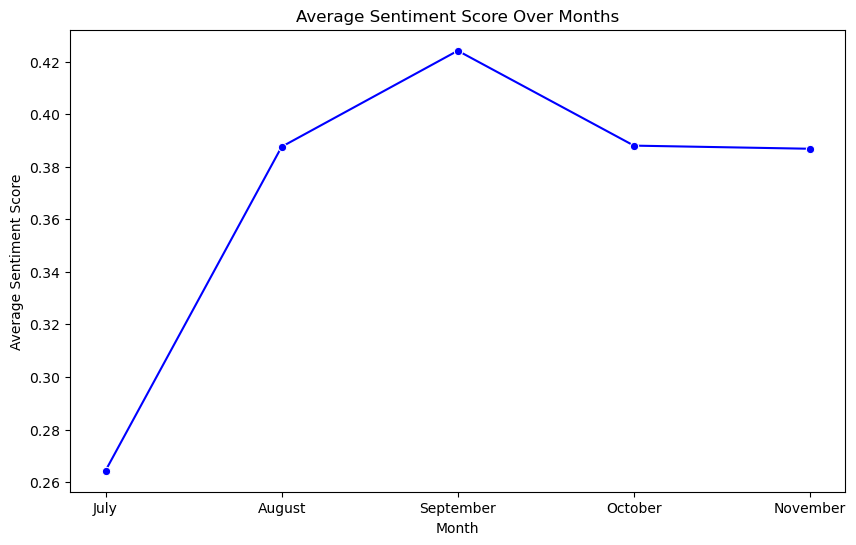

In [24]:
month_order = ['July', 'August', 'September', 'October', 'November']

df_bing_nov['Month'] = pd.Categorical(df_bing_nov['Month'], categories=month_order, ordered=True)

# Group by month and calculate the mean sentiment score
df_agg = df_bing_nov.groupby('Month')['sentiment_score'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='sentiment_score', data=df_agg, marker='o', color='blue')
plt.title('Average Sentiment Score Over Months')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.show()

In [15]:
df_bing_nov.head()

,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,userImage,userName,content_clean,sentiment_score,month,Month,Day,Year,version
0,27.4.411122302,2023-11-29,The app is performing worse and worse with eac...,NaN,NaN,27.4.411122302,61257ee8-fa12-469b-88ff-1c0952d029c3,1,333,https://play-lh.googleusercontent.com/a/ACg8oc...,Joshua Sheely,the app is performing worse and worse with eac...,-0.136250,11,November,29,2023,27
1,27.4.411122310,2023-11-30,"Just like most people here, I only downloaded ...",NaN,NaN,27.4.411122310,f3926081-5079-48da-9489-a6fc00073594,1,180,https://play-lh.googleusercontent.com/a-/ALV-U...,Amara,just like most people here i only downloaded t...,-0.100000,11,November,30,2023,27
2,27.4.411122310,2023-11-29,"Unimpressive & underwhelming, in spite of AI h...",NaN,NaN,27.4.411122310,a78fc75e-aa74-430a-87c4-e095eb7f6111,1,48,https://play-lh.googleusercontent.com/a-/ALV-U...,Jared H.,unimpressive underwhelming in spite of ai hype...,-0.041667,11,November,29,2023,27
3,27.3.411031318,2023-11-12,The app itself works very well as a search eng...,NaN,NaN,27.3.411031318,3efbdcf8-bcb7-4f6f-aa0e-205a1e1d164c,4,350,https://play-lh.googleusercontent.com/a-/ALV-U...,Marcos â€œMAS10Xâ€ Saldivar,the app itself works very well as a search eng...,0.103333,11,November,12,2023,27
4,27.3.411031318,2023-11-13,"I like being rewards it's great, but the bing ...",NaN,NaN,27.3.411031318,16fcd6a2-1962-4864-9497-5bce92749662,1,64,https://play-lh.googleusercontent.com/a-/ALV-U...,j smither,i like being rewards its great but the bing ap...,0.100641,11,November,13,2023,27


In [16]:

# Step 1: Filter rows with version 0 and month July
data_26 = df_bing_nov[(df_bing_nov['version'] == 26)]
data_27 = df_bing_nov[(df_bing_nov['version'] == 27)]

In [17]:
data_27.sample(2)

,appVersion,at,content,repliedAt,replyContent,reviewCreatedVersion,reviewId,score,thumbsUpCount,userImage,userName,content_clean,sentiment_score,month,Month,Day,Year,version
18825,27.3.411031318,2023-11-17,good,NaN,NaN,27.3.411031318,918654b1-b782-43a9-8a94-7b392cac5c9a,3,0,https://play-lh.googleusercontent.com/a-/ALV-U...,Junior Barozi,good,0.700000,11,November,17,2023,27
698,27.1.410926310,2023-10-01,It's a fantastic job integrating the chatGPT i...,NaN,NaN,27.1.410926310,27296233-0cab-4756-8a1f-ad2e8184ce2b,5,1,https://play-lh.googleusercontent.com/a/ACg8oc...,Zachary Cook,its a fantastic job integrating the chatgpt in...,0.393333,10,October,1,2023,27


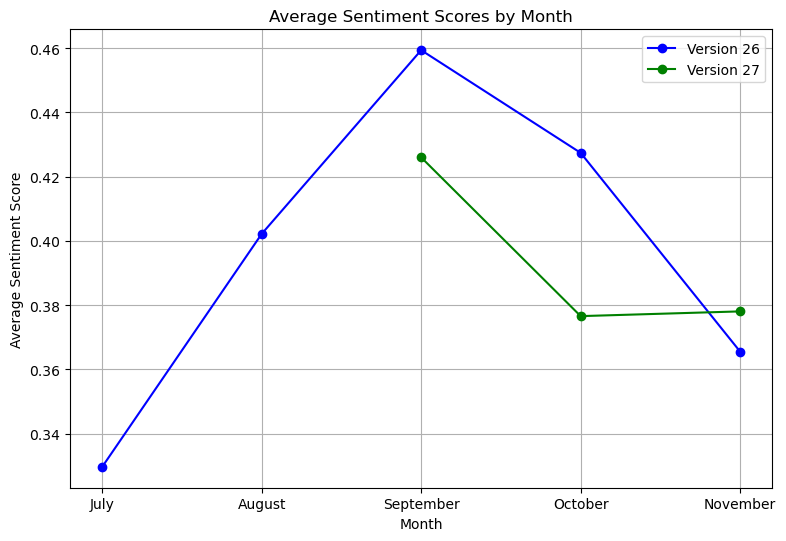

In [21]:

# Step 2: Get a random sample of 650 rows
random_sample_26 = data_26.sample(n=650, random_state=42)  # You can change the random_state
random_sample_27 = data_27.sample(n=650, random_state=42)  # You can change the random_state

# Convert 'Month' to a categorical type with the desired order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
random_sample_26['Month'] = pd.Categorical(random_sample_26['Month'], categories=month_order, ordered=True)
random_sample_27['Month'] = pd.Categorical(random_sample_27['Month'], categories=month_order, ordered=True)

# Step 3: Calculate the average sentiment score for each month
avg_sentiment_26_month = random_sample_26.groupby('Month')['sentiment_score'].mean().reset_index()
avg_sentiment_27_month = random_sample_27.groupby('Month')['sentiment_score'].mean().reset_index()

# Sort the DataFrames by the custom order
avg_sentiment_26_month = avg_sentiment_26_month.sort_values('Month')
avg_sentiment_27_month = avg_sentiment_27_month.sort_values('Month')

# Plotting the time series graph
plt.figure(figsize=(8, 6))

# Plot average sentiment score for each month in a single plot
plt.plot(avg_sentiment_26_month['Month'], avg_sentiment_26_month['sentiment_score'], marker='o', label='Version 26', color='blue')
plt.plot(avg_sentiment_27_month['Month'], avg_sentiment_27_month['sentiment_score'], marker='o', label='Version 27', color='green')

# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


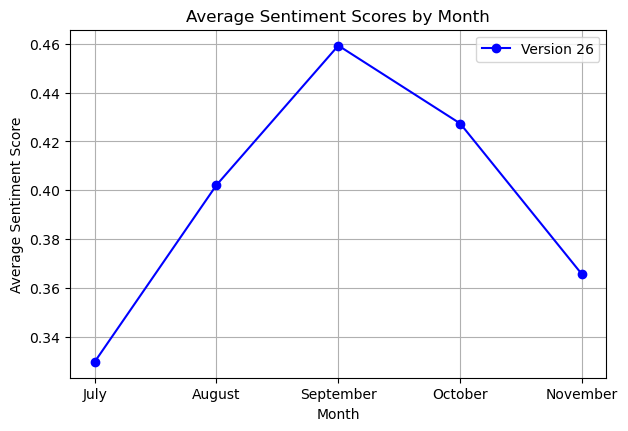

In [22]:
plt.plot(avg_sentiment_26_month['Month'], avg_sentiment_26_month['sentiment_score'], marker='o', label='Version 26', color='blue')

# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


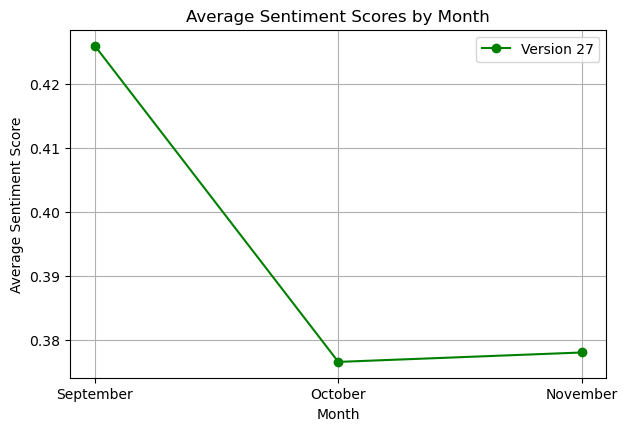

In [23]:
plt.plot(avg_sentiment_27_month['Month'], avg_sentiment_27_month['sentiment_score'], marker='o', label='Version 27', color='green')

# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# calculating avg sentiment score based on random sampling
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

random_sample_month = df_time_sentiment_bing_1.sample(n=1282, random_state=42)
random_sample_month['Month_name'] = pd.Categorical(random_sample_month['Month_name'], categories=month_order, ordered=True)
avg_sentiment_month = random_sample_month.groupby('Month_name')['sentiment_score'].mean().reset_index()

plt.plot(avg_sentiment_month['Month_name'], avg_sentiment_month['sentiment_score'], marker='o')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Day')
plt.ylabel('Sentiment Score')
plt.show()